In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

from os import listdir
data_list = listdir('dataset_new/train')


data_list

['Closed', 'no_yawn', 'Open', 'yawn']

In [2]:


from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf




batch_size    = 128
NUM_EPOCHS    = 5
LEARNING_RATE =0.0001
img_height = 256
img_width = 256



train_batches = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset_new/train',
    #validation_split=0.2,
    #subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

valid_batches = tf.keras.preprocessing.image_dataset_from_directory(
'dataset_new/test',
    #validation_split=0.2,
    #subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 2467 files belonging to 4 classes.
Found 433 files belonging to 4 classes.


In [3]:
class_names = train_batches.class_names

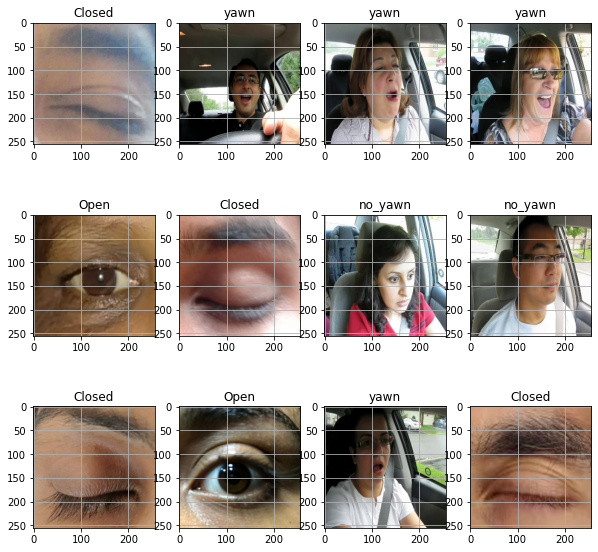

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_batches.take(1):
  for i in range(12):
    ax = plt.subplot(3,4 , i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [5]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_batches = train_batches.cache().prefetch(buffer_size=AUTOTUNE)
valid_batches = valid_batches.cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense


from keras import models
from keras import layers

In [7]:

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))


conv_base.trainable = False


model = models.Sequential()
model.add(conv_base)


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))


model.add(layers.Dense(4, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])


In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 23,104,580
Trainable params: 8,389,892
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [9]:

result=model.fit(train_batches,
                       
                        validation_data = valid_batches,
                        
                        epochs= NUM_EPOCHS,
                 
                       )

Epoch 1/5
20/20 [==============================] - 487s 24s/step - loss: 3.2264 - acc: 0.8050 - val_loss: 0.4708 - val_acc: 0.9446
Epoch 2/5
20/20 [==============================] - 521s 26s/step - loss: 0.3828 - acc: 0.9526 - val_loss: 0.4024 - val_acc: 0.9630
Epoch 3/5
20/20 [==============================] - 533s 27s/step - loss: 0.1391 - acc: 0.9814 - val_loss: 0.3459 - val_acc: 0.9561
Epoch 4/5
20/20 [==============================] - 510s 25s/step - loss: 0.0160 - acc: 0.9951 - val_loss: 0.4189 - val_acc: 0.9630
Epoch 5/5
20/20 [==============================] - 506s 25s/step - loss: 0.0147 - acc: 0.9964 - val_loss: 0.2270 - val_acc: 0.9723


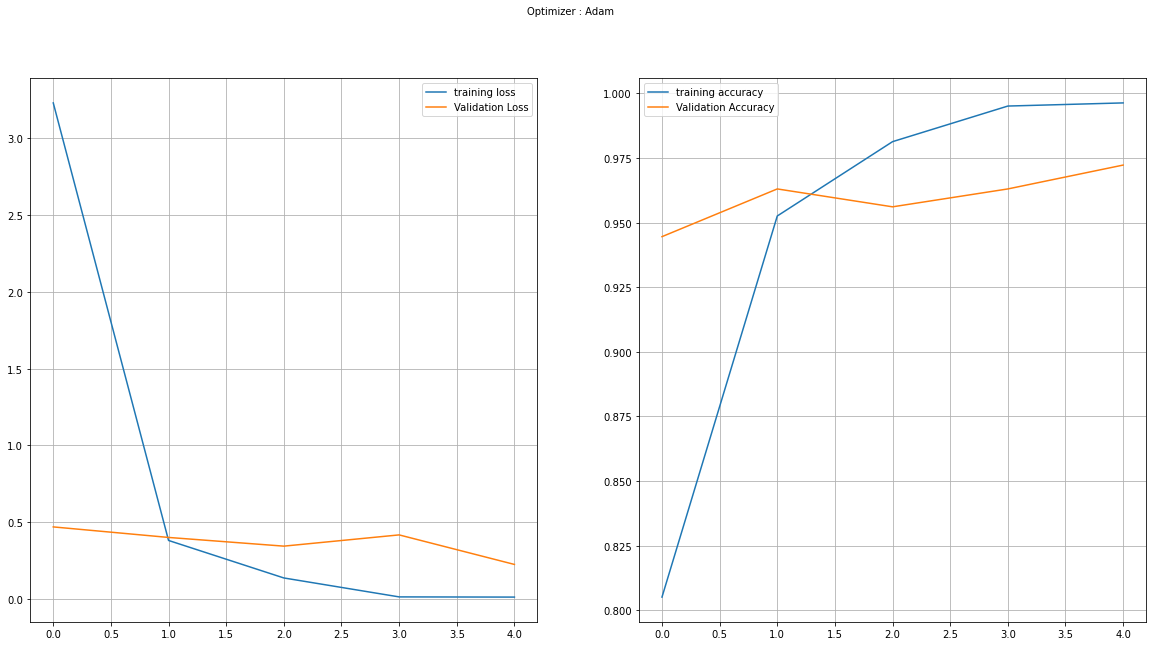

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.plot(result.history['loss'], label = 'training loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(result.history['acc'], label = 'training accuracy')
plt.plot(result.history['val_acc'], label='Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

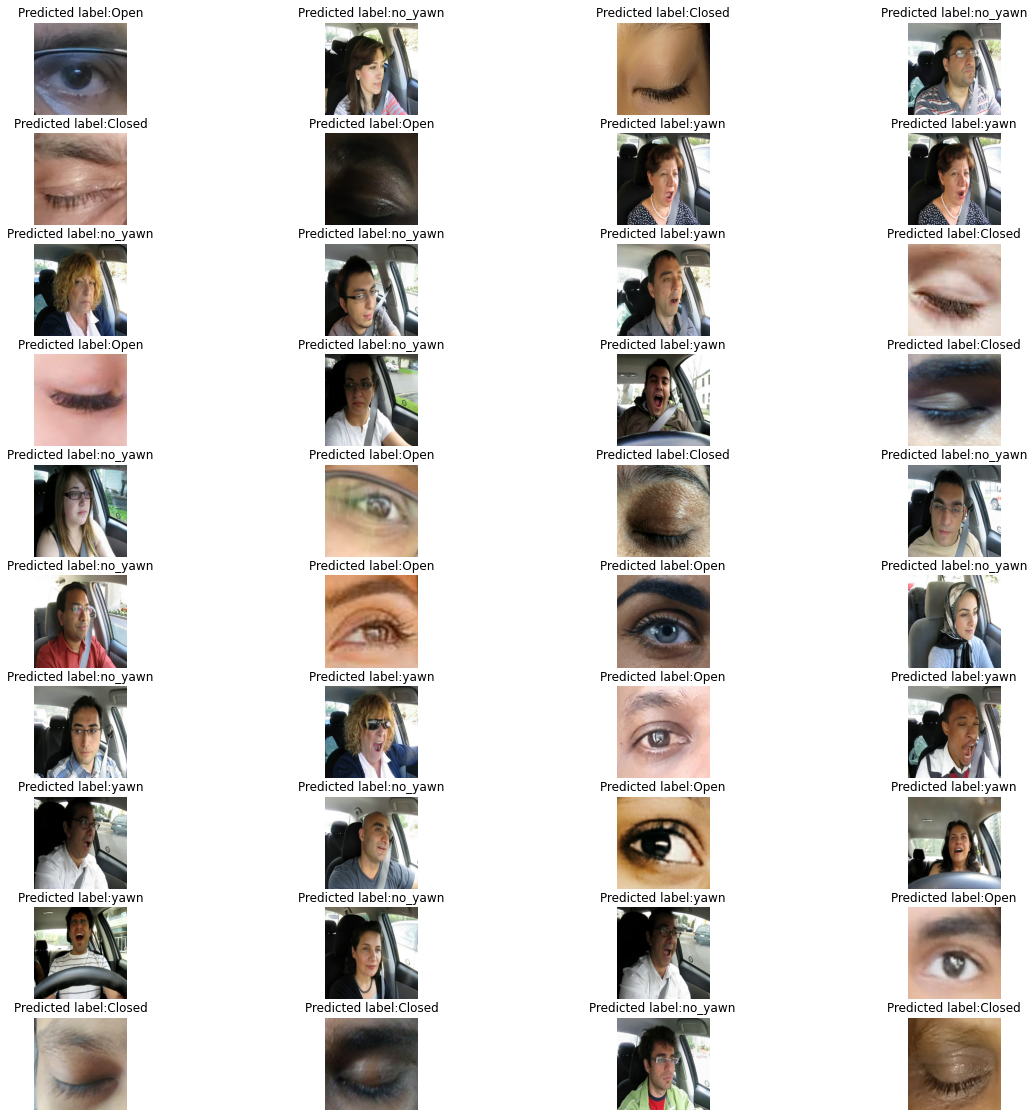

In [11]:
import numpy as np 
import pandas as pd 
import cv2

plt.figure(figsize=(20, 20))
for images, labels in valid_batches.take(2):
    predictions = model.predict(images)
    predlabel = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
    
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predicted label:'+ predlabel[i])
        plt.axis('off')
        plt.grid(True)